<a href="https://colab.research.google.com/github/Guympele/Projets-on-Data-Analysis/blob/Data-sets-analysis/Projet_2_Customer_Income_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget https://www.dropbox.com/s/wnlg2hmr3pfc4hu/STAT%20S01V17.zip
!unzip  "STAT S01V17.zip"

--2024-04-06 07:26:54--  https://www.dropbox.com/s/wnlg2hmr3pfc4hu/STAT%20S01V17.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wnlg2hmr3pfc4hu/STAT%20S01V17.zip [following]
--2024-04-06 07:26:54--  https://www.dropbox.com/s/raw/wnlg2hmr3pfc4hu/STAT%20S01V17.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc892a95cf46a1718348b91d74ac.dl.dropboxusercontent.com/cd/0/inline/CQdB-qS9Fp6Qa_I4wpgOwp-LUeyemspCcKY4N7c_agVX0WLARusQqCpYq3ylzCV_Tamja1MOa635DfNiSwpj45r1h5P8FNlM85c0avxWQklqPNvDtlaUfkVhDXgusxjSlXWE1uqNCLwAO57vKXLSSFFW/file# [following]
--2024-04-06 07:26:54--  https://uc892a95cf46a1718348b91d74ac.dl.dropboxusercontent.com/cd/0/inline/CQdB-qS9Fp6Qa_I4wpgOwp-LUeyemspCcKY4N7c_agVX0WLARusQqCpYq3ylzCV_Tamja1MOa635DfNiSwpj45r

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("customer_income_data.csv")
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


**Task 1**: Check for NullValues and Drop them

In [29]:
# Check for null values
print("Null values before dropping:\n", df.isnull().sum())

Null values before dropping:
 CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64


We observe that we don't have Null Values in our dataset

**Task** **2** : Measures of Central Tendency for Annual Income Column of Customers

In [37]:
# Mean Value
df[['AnnualIncome','SpendingScore']].mean()

AnnualIncome     285143.931646
SpendingScore        50.705000
dtype: float64

In [38]:
# Median Value
df[['AnnualIncome','SpendingScore']].median()

AnnualIncome     263418.50555
SpendingScore        48.00000
dtype: float64

In [40]:
# Mode Value
df['AnnualIncome'].mode()

0        2577.057456
1        5121.652342
2       10349.414070
3       12396.061280
4       15305.842870
           ...      
195    651534.309800
196    671028.187200
197    675461.735700
198    687212.770700
199    695407.091700
Name: AnnualIncome, Length: 200, dtype: float64

**Task** **3** : Measures of dispersion and Shape for the spending Scores Column ( Variance, standard deviation and Skewness )

In [21]:
# Variance Value
df['SpendingScore'].var(ddof=0)

820.867975

In [22]:
# Standard Deviation Value
df["SpendingScore"].std(ddof=0)

28.650793619025634

In [24]:
# Skewness Value
from scipy.stats import skew
print(f"The skewness of the spending score of customers is :{skew(df['SpendingScore'])}")

The skewness of the spending score of customers is :0.10081837365183154


Since that the skew value is 0.10081837365183154 > 0, We have Left skewed Data.

**Task** **4** : Evaluation of the Z-Score for the Annual Income and The Spending Score for Customers to detect Outliers.

In [33]:
from scipy.stats import zscore
# Assuming that our dta follow the normal distribution
z = np.abs(zscore(df[['AnnualIncome','SpendingScore']]))
z

,AnnualIncome,SpendingScore
0,1.435993,0.952679
1,0.462074,0.429133
2,0.715143,0.638551
3,1.356137,0.722668
4,0.171497,1.560341
...,...,...
195,0.191478,0.045199
196,0.226068,0.254618
197,1.043125,0.513249
198,0.740657,0.932086


**Condition** **to** **be** **Outlier** : If the value of zscore > 2.

In [34]:
np.where(z>2)

(array([ 62,  65, 114, 148, 155, 166, 171, 177, 194]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

The column Annual Income has 9 Outliers in rows ( 62,65,114,148,155,166,171,177,194)

In [35]:
# Confirmation

z.iloc[62]

AnnualIncome     2.312233
SpendingScore    0.289521
Name: 62, dtype: float64

In [36]:
# Confirmation

z.iloc[65]

AnnualIncome     2.014567
SpendingScore    1.281116
Name: 65, dtype: float64

**Task** **5** : Evaluation of CustomerAge and SpendingScore of Customers using Scatter Plot to detect Outliers

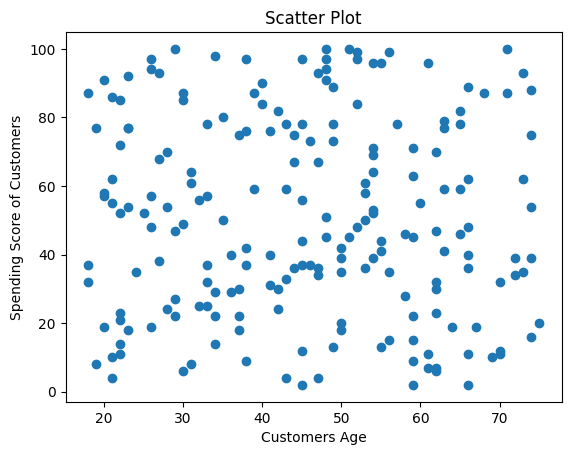

In [27]:
plt.scatter(df['CustomerAge'], df['SpendingScore'])
plt.xlabel('Customers Age')
plt.ylabel('Spending Score of Customers')
plt.title('Scatter Plot')
plt.show()

They aren't Outliers by observing this scatter plot.